## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "~/Desktop/homework/Mouse_metadata.csv"
study_results_path = "~/Desktop/homework/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Print
mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results,on ="Mouse ID",how='outer')
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the DataFrame
sum_mouse = combined.count()
sum_mouse.head()

Mouse ID        1893
Drug Regimen    1893
Sex             1893
Age_months      1893
Weight (g)      1893
dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse =  combined.groupby(['Mouse ID','Timepoint']).mean()
duplicate_mouse.head()


Age_months  Weight (g)  Tumor Volume (mm3)  \
Mouse ID Timepoint                                               
a203     0                20.0        23.0           45.000000   
         5                20.0        23.0           48.508468   
         10               20.0        23.0           51.852437   
         15               20.0        23.0           52.777870   
         20               20.0        23.0           55.173336   

                    Metastatic Sites  
Mouse ID Timepoint                    
a203     0                       0.0  
         5                       0.0  
         10                      1.0  
         15                      1.0  
         20                      1.0

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_mouse_id = (combined['Mouse ID'].unique()) 
print (unique_mouse_id)

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

In [8]:
# Checking the number of mice in the clean DataFrame.
number_mouse_id = (combined['Mouse ID'].nunique()) 
number_mouse_id

249

In [32]:
#group drug and timepoint and average the values in tumor volume(mm3)
grouped_drug = combined.groupby(["Drug Regimen","Timepoint"]).mean()
drug_mean = grouped_drug["Tumor Volume (mm3)"]
drug_mean = drug_mean.reset_index()
drug_mean = pd.DataFrame(dfmean)
drug_mean.head()

,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [36]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
mean_summary =  combined.groupby(['Sex','Tumor Volume (mm3)'])
mean_summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [46]:
sem_summary = pd.DataFrame(combined.groupby(['Sex', 'Timepoint']).sem()['Tumor Volume (mm3)'])
sem_summary.head()

Tumor Volume (mm3)
Sex    Timepoint                    
Female 0                    0.000000
       5                    0.167049
       10                   0.282012
       15                   0.442386
       20                   0.623099

In [45]:
sem_summary = pd.DataFrame(combined.groupby(['Sex', 'Timepoint']).count()['Tumor Volume (mm3)'])
sem_summary.head()

Tumor Volume (mm3)
Sex    Timepoint                    
Female 0                         125
       5                         118
       10                        111
       15                        102
       20                         96

## Bar Plots

In [69]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#chart attributes

bar_summary = pd.pivot_table(combined, index='Timepoint', columns='Drug Regimen', values='Tumor Volume (mm3)', aggfunc = np.mean)
bar_summary



SyntaxError: invalid syntax (<ipython-input-69-3668ce74f142>, line 4)

## Pie Plots

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_type = combined.groupby('sex')
plt.xlabel ("Female")
plt.ylabel("Male")
plt.title("Male vs Female Distribution")
plt.pie(sex, explode)
plt.axhline(linewidth=1, color='black', y=0)
plt.xticks(x, sex)
plt.show()


KeyError: 'sex'

## Quartiles, Outliers and Boxplots

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [74]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
grouped_drug = combined.groupby(["Drug Regimen","Timepoint"]).mean()
drug_mean = grouped_drug["Tumor Volume (mm3)"]
drug_mean = drug_mean.reset_index()
drug_mean = pd.DataFrame(dfmean)
drug_mean.head()

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="red", s=x_axis, alpha=0.75)
plt.show()

NameError: name 'x_axis' is not defined

NameError: name 'explode' is not defined

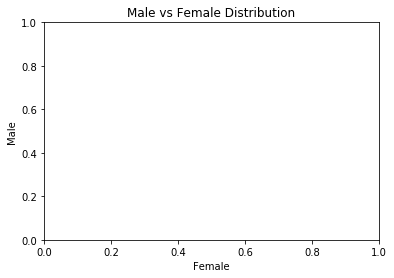

In [70]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.xlabel ("Female")
plt.ylabel("Male")
plt.title("Male vs Female Distribution")
plt.pie('sex', explode)
plt.show()

## Correlation and Regression

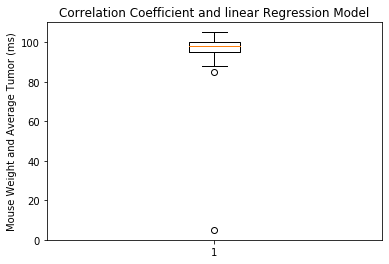

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


tumor_volume = [96,98,100,105,85,88,95,100,101,102,97,98,5]
fig1, ax1 = plt.subplots()
ax1.set_title('Correlation Coefficient and linear Regression Model')
ax1.set_ylabel('Mouse Weight and Average Tumor (ms)')
ax1.boxplot(times)
plt.show()


In [72]:
# We need to sort the data to determine which could be outliers
times.sort()
print(times)

[5, 85, 88, 95, 96, 97, 98, 98, 100, 100, 101, 102, 105]


In [77]:
Timepoint = Tumor_response.index
plt.figure(figsize=(12,8)), label="Zoniferol")
plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

SyntaxError: invalid syntax (<ipython-input-77-4131f380f894>, line 2)